In [29]:
import matplotlib.pyplot as plt
from math import sqrt, cos, pi

### 01
Solve this equation system: <br>
__x - 2y + 2z = 3<br>
-x + y + z = 4<br>
2x + 2y - 3z = -3<br><br>__

In [7]:
a = [1, -2, 2, 3]
b = [-1, 1, 1, 4]
c = [2, 2, -3, -3]

# Remove x from (b) and (c)
a1 = a  # x - 2y + 2z = 3
b1 = [b[i] + a[i] for i in range(len(b))]  # -y + 3z = 7
c1 = [c[i] - 2*a[i] for i in range(len(c))]  # 6y - 7z = -9

# Remove y from (a) and (c)
a2 = [a1[i] - 2*b1[i] for i in range(len(a1))]  # x - 4z = -11
b2 = b1  # -y + 3z = 7
c2 = [c1[i] + 6*b1[i] for i in range(len(c1))]  # 11z = 33

# Calculate x, y, z
z = int(c2[3] / c2[2])  # 11z = 33 <=> 11z / 11 = 33 / 11 <=> z = 3
x = ((a2[2] * z) * (-1)) + a2[3]  # x - 4z = -11 <=> x - (4 * 3) = -11 <=> x - 12 = -11 <=> x = -11 + 12 = 1
y = abs((b2[3] + ((b2[0] * x) * (-1))) + ((b2[2] * z) * (-1)))  # -y + 3z = 7 <=> -y + (3 * 3) = 7 <=> -y + 9 = 7 <=> -y = 7 - 9 = -2 <=> y = 2

# print whether left side is equivalent to the right side of the equation system and the values of (x, y, z)
print(sum([a[0] * x, a[1] * y, a[2] * z]) == a[3],
      sum([b[0] * x, b[1] * y, b[2] * z]) == b[3],
      sum([c[0] * x, c[1] * y, c[2] * z]) == c[3])
print(f'x = {x}\ny = {y}\nz = {z}')

True True True
x = 1
y = 2
z = 3


### 02
We have the following coordinates in a coordinate system:<br>
__P = (0, 0)<br>
Q = (2, 3)<br>
R = (8, 8)<br><br>__
- Calculate the distances _PQ_, _QR_ and plot them graphically.
- Create a function that takes just any number of distances and plots them graphically

In [9]:
def plot_distances(*coordinates: list, sort=False) -> None:
    """
    Takes just any numbers of lists, containing 2 integers, and plots lines between the dots.
    :param coordinates: args, lists that contain exactly 2 integers, x and y coordinates
    :param sort: bool, whether the coordinates should be sorted (by x-coord) or not (False by default)
    :return: None
    """

    def valid_points(p: list, q: list) -> bool:
        """
        Check whether coordinates are correct format and contains exactly 2 coordinates
        :param p: list, point P
        :param q: list, point Q
        :return: bool
        """
        return isinstance(p[0], int) and isinstance(q[0], int) and isinstance(p[1], int) and isinstance(q[1], int) \
               and len(coordinates[i]) == 2

    if sort:
        coordinates = sorted(coordinates, key=lambda x: x[0])
    points = []

    for i in range(len(coordinates) - 1):
        if valid_points(coordinates[i], coordinates[i + 1]):
            points.append([coordinates[i + 1][0], coordinates[i][0]])
            points.append([coordinates[i + 1][1], coordinates[i][1]])
            plt.text(int(coordinates[i][0]), int(coordinates[i][1]),
                     f'. {int(coordinates[i][0]), int(coordinates[i][1])}')

            if i == len(coordinates) - 2:
                plt.text(int(coordinates[i + 1][0]), int(coordinates[i + 1][1]),
                         f'. {int(coordinates[i + 1][0]), int(coordinates[i + 1][1])}')
        else:
            points.clear()
            print('One or more of the coordinates are in wrong format!')
            break

    if len(points) > 0:
        plt.plot(*points)
        plt.yscale('linear')
        plt.grid(True)
        plt.show()

Length P -> Q: 3.605551275463989
Length Q -> R: 7.810249675906654


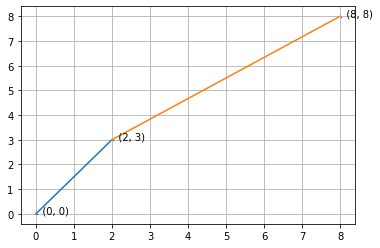

In [12]:
P = [0, 0]
Q = [2, 3]
R = [8, 8]

# Calculate and print the length of the distances P->Q and Q->R
PQ = sqrt(((Q[0] - P[0]) ** 2) + ((Q[1] - P[1]) ** 2))
QR = sqrt(((R[0] - Q[0]) ** 2) + ((R[1] - Q[1]) ** 2))
print(f'Length P -> Q: {PQ}\nLength Q -> R: {QR}')

plot_distances(P, Q, R)

### 03
We have the following vectors:<br>
__u = (1, 2, 3)<br>
v = (2, 2, 2)<br>
w = (1, 0, 1, 0, 1)<br>
x = (5, 6, 6, 5, 9)<br><br>__
- Calculate _u + v_ and _w + x_
- Create a function that takes just any number of vectors, in just any dimension, and calculates the sum

In [13]:
def add_vectors(*vectors: list) -> list:
    """
    Takes just any numbers of vectors and returns their sum, as long as they're in the same dimension
    :param vectors: args, lists of vectors to calculate the sum from
    :return: list
    """
    length = len(vectors[0])
    sum = [0 for _ in range(length)]

    for vector in vectors:
        if len(vector) == length:
            for i in range(len(vector)):
                sum[i] += vector[i]
        else:
            return 'One or more of the vectors are in the wrong format!'

    return sum

In [17]:
u = [1, 2, 3]
v = [2, 2, 2]
w = [1, 0, 1, 0, 1]
x = [5, 6, 6, 5, 9]

# u + v
print(add_vectors(u, v))

# w + x
print(add_vectors(w, x))

[3, 4, 5]
[6, 6, 7, 5, 10]


### 04
We have the following parallel vectors:<br>
__u = (0, 2, 3)<br>
v = (0, 4, 6)<br><br>__
- Calculate the scalar product _u·v_
- Create a function that takes two vectors, in just any dimension, and calculates their scalar product

In [19]:
def calculate_scalar_product(u: list, v: list, degrees=None, radians=0.) -> float:
    """
    Takes two vectors from just any dimensions, they need to be in the same dimension tho,
    and calculates their scalar product.
    The vectors are considered parallel by default.
    :param u: list, vector u
    :param v: list, vector v
    :param degrees: float, angle in degrees
    :param radians: float, angle in radians
    :return: float
    """
    if len(u) != len(v):
        return 'One of the vectors are in the wrong format!'

    # Calculated with the formula: a·b = |a||b|cos(u,v)
    len_u, len_v = 0, 0

    for i in range(len(u)):
        len_u += u[i] ** 2
        len_v += v[i] ** 2

    # Calculate the angle from radians
    if degrees:
        radians = (degrees / 180) * pi

    return sqrt(len_u) * sqrt(len_v) * cos(radians)

In [21]:
u = [0, 2, 3]
v = [0, 4, 6]

# u·v
print(calculate_scalar_product(u, v))

25.999999999999996


### 05
We have the following matrices:<br>
__A<br>[1 2]<br>[3 2]<br><br>
B<br>[4 5]<br>[6 5]<br><br>__
- Calculate _A+B_
- Create a function that takes two matrices, with just any dimensions, and calculates the sum

In [24]:
def print_matrices(a: list) -> None:
    if a:
        print(f'Type: {len(a)}x{len(a[0])}')
        for row in a:
            print(row)
            

def add_matrices(a: list, b: list) -> list:
    """
    Takes two matrices with just any, but the same type, and calculates the sum.
    :param a: nested list, matrix A
    :param b: nested list, matrix B
    :return: list, matrix AB
    """
    def valid_matrix(*args):
        """Checks whether matrix A is the same type as matrix B"""
        return all(len(x) == len(args[0]) for x in args[1:])

    for i in range(len(a)):
        if len(a) != len(b) or not valid_matrix(a[i], b[i]):
            print('One of the matrices are in the wrong format!')
            return None

    return [[a[i][j] + b[i][j] for j, column in enumerate(row)] for i, row in enumerate(a)]

In [26]:
A = [[1, 2], [3, 2]]
B = [[4, 5], [6, 5]]

# A+B
print_matrices(add_matrices(A, B))

Type: 2x2
[5, 7]
[9, 7]


### 06
We have the following matrices:<br>
__A<br>[1 2]<br>[3 2]<br>[1 3]<br><br>
B<br>[4 5 6]<br>[6 5 4]<br><br>__
- Calculate _AB_ and print the new matrix type (_mxn_)
- Create a function that takes two matrices, with just any dimensions, and calculates the product. Print the new matrix type or an error message if it's unmultiplable

In [27]:
def multiply_matrices(a: list, b: list) -> list:
    """
    Takes two matrices, of just any type, and multiply them together.
    :param a: nested list, matrix A
    :param b: nested list, matrix B
    :return: list, matrix AB
    """
    def valid_matrix(*args):
        """Checks whether matrix A can multiply with B"""
        return len(args[1]) == len(args[0])

    ab = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]

    for i, _ in enumerate(a):
        if not valid_matrix(a[i], b):
            print('One of the matrices are in the wrong format!')
            return None

        for j, row in enumerate(b):
            for k, column in enumerate(row):
                ab[i][k] += (a[i][j] * b[j][k])

    return ab

In [28]:
A = [
    [1, 2],
    [3, 2],
    [1, 3]
]
B = [
    [4, 5, 6],
    [6, 5, 4]
]

# AB
print_matrices(multiply_matrices(A, B))

Type: 3x3
[16, 15, 14]
[24, 25, 26]
[22, 20, 18]
